<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#각-Feature와-rating의-상관관계-파악하기" data-toc-modified-id="각-Feature와-rating의-상관관계-파악하기-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>각 Feature와 <code>rating</code>의 상관관계 파악하기</a></span><ul class="toc-item"><li><span><a href="#(1)-age와-rating의-상관관계" data-toc-modified-id="(1)-age와-rating의-상관관계-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>(1) <code>age</code>와 <code>rating</code>의 상관관계</a></span></li><li><span><a href="#(2)-gender와-rating의-상관관계" data-toc-modified-id="(2)-gender와-rating의-상관관계-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>(2) <code>gender</code>와 <code>rating</code>의 상관관계</a></span></li><li><span><a href="#(3)-year와-rating의-상관관계" data-toc-modified-id="(3)-year와-rating의-상관관계-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>(3) <code>year</code>와 <code>rating</code>의 상관관계</a></span></li><li><span><a href="#(4)-occupation과-rating의-상관관계" data-toc-modified-id="(4)-occupation과-rating의-상관관계-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>(4) <code>occupation</code>과 <code>rating</code>의 상관관계</a></span></li><li><span><a href="#(5)-영화-장르와-rating의-상관관계" data-toc-modified-id="(5)-영화-장르와-rating의-상관관계-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>(5) 영화 장르와 <code>rating</code>의 상관관계</a></span></li></ul></li><li><span><a href="#두-Features의-조합과-rating의-상관관계-파악하기" data-toc-modified-id="두-Features의-조합과-rating의-상관관계-파악하기-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>두 Features의 조합과 <code>rating</code>의 상관관계 파악하기</a></span><ul class="toc-item"><li><span><a href="#(1)-영화-장르-및-occupation과-rating의-상관관계" data-toc-modified-id="(1)-영화-장르-및-occupation과-rating의-상관관계-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>(1) 영화 장르 및 <code>occupation</code>과 <code>rating</code>의 상관관계</a></span></li><li><span><a href="#(2)-영화-장르-및-age와-rating의-상관관계" data-toc-modified-id="(2)-영화-장르-및-age와-rating의-상관관계-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>(2) 영화 장르 및 <code>age</code>와 <code>rating</code>의 상관관계</a></span></li></ul></li></ul></div>

In [8]:
import os
import random
from tqdm.notebook import tqdm
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sb
from google_drive_downloader import GoogleDriveDownloader as gdd
from sklearn.model_selection import train_test_split
from itertools import combinations

tqdm.pandas()
np.set_printoptions(edgeitems=3, infstr="inf", linewidth=75, nanstr="nan", precision=8, suppress=False, threshold=1000, formatter=None)
plt.style.use("dark_background")

C:\Users\82104\anaconda3\lib\site-packages\tqdm\std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [3]:
# age: (0~4: 0, 5~9: 1, 10~14: 2, ...)
users = pd.read_csv("Datasets/MovieLens 100k/100k_users.csv")
# year: 영화 개봉 연도
movies = pd.read_csv("Datasets/MovieLens 100k/100k_movies.csv")
ratings = pd.read_csv("Datasets/MovieLens 100k/100k_ratings.csv")

In [4]:
data = pd.merge(ratings, users, on="user_id")
data = pd.merge(data, movies, on="item_id")

### 각 Feature와 `rating`의 상관관계 파악하기
- 각 특성의 서로 다른 값에 따라 `rating`이 어떻게 달라지는지 파악하여 어떤 특성이 importance가 높은지 확인할 수 있습니다.

#### (1) `age`와 `rating`의 상관관계
- 나이가 많을수록 평점이 높아지는 약한 상관관계를 볼 수 있습니다.

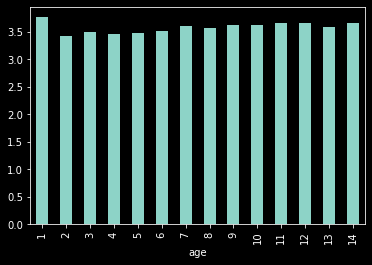

In [11]:
gby_age = data.groupby(["age"])["rating"].mean()

# Correlation of `age`-`rating`: 나이가 많을수록 평점이 아주 약간 높아집니다.
gby_age.plot.bar();

#### (2) `gender`와 `rating`의 상관관계
- 유의미한 차이는 없어 보입니다.

In [188]:
gby_gender = data.groupby(["gender"])["rating"].mean()

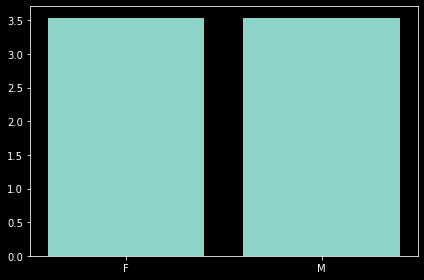

In [189]:
plt.style.use("dark_background")

fig, ax = plt.subplots()

ax.bar(x=gby_gender.index, height=gby_gender)

fig.tight_layout()

#### (3) `year`와 `rating`의 상관관계
- 최신 영화일수록 평점이 낮아지는 약한 경향성을 볼 수 있습니다.

In [103]:
gby_yr = data.groupby(["year"])["rating"].mean()

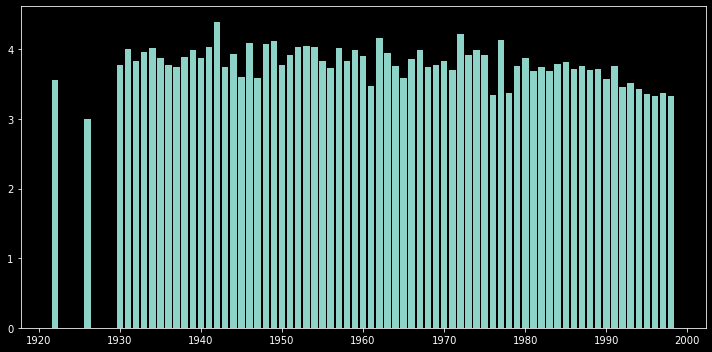

In [104]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(x=gby_yr.index, height=gby_yr)

fig.tight_layout()

#### (4) `occupation`과 `rating`의 상관관계

In [190]:
gby_occup = data.groupby(["occupation"])["rating"].mean().sort_values()

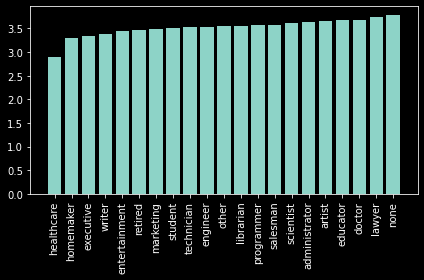

In [191]:
fig, ax = plt.subplots()

ax.bar(x=gby_occup.index, height=gby_occup)

ax.tick_params(axis="x", labelrotation=90)

fig.tight_layout()

#### (5) 영화 장르와 `rating`의 상관관계

In [193]:
genres = data.loc[:, "unknown":"Western"].columns

genre2rating = {}
genre2n_rating = {}
for genre in genres:
    data_genre = data[data[genre]==1]
    genre2rating[genre] = data_genre["rating"].mean().round(2)
    genre2n_rating[genre] = len(data_genre)

gby_genre = pd.DataFrame({"mean":genre2rating, "n_rating":genre2n_rating}).sort_values(by=["mean"])

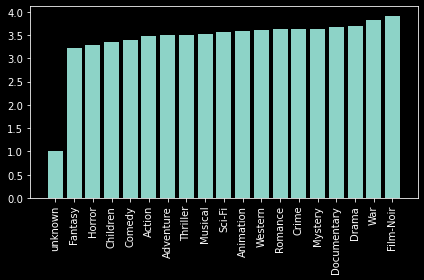

In [226]:
fig, ax = plt.subplots()

ax.bar(x=gby_genre.index, height=gby_genre["mean"])

ax.tick_params(axis="x", labelrotation=90)

fig.tight_layout()

### 두 Features의 조합과 `rating`의 상관관계 파악하기

#### (1) 영화 장르 및 `occupation`과 `rating`의 상관관계

In [277]:
rows = []
for genre in genres:
    for occup in set(data["occupation"]):
        rating = round(data[(data[genre]==1) & (data["occupation"]==occup)]["rating"].mean(), 2)
        
        rows.append((genre, occup, rating))

gby_genre_occup = pd.DataFrame(rows, columns=["genre", "occup", "mean"])
gby_genre_occup = pd.pivot_table(gby_genre_occup, index="genre", columns="occup", values="mean")

gby_genre_occup = gby_genre_occup.loc[gby_genre.index, gby_occup.index]

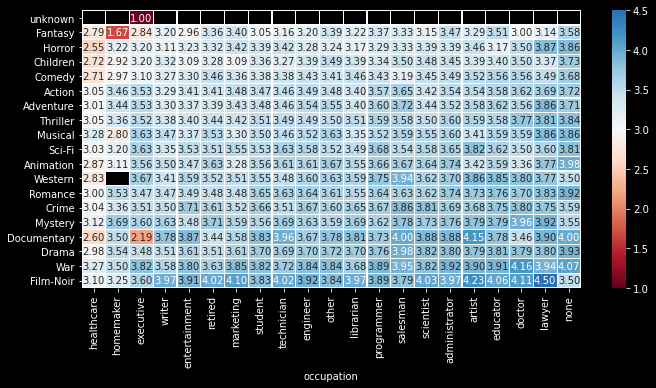

In [289]:
fig, ax = plt.subplots(figsize=(10, 5.5))

sb.heatmap(ax=ax, data=gby_genre_occup, annot=True, annot_kws={"size": 10}, fmt=".2f", linewidths=0.2, center=3, cmap="RdBu")

fig.tight_layout()

#### (2) 영화 장르 및 `age`와 `rating`의 상관관계

In [283]:
rows = []
for genre in genres:
    for age in set(data["age"]):
        rating = round(data[(data[genre]==1) & (data["age"]==age)]["rating"].mean(), 2)
        
        rows.append((genre, age, rating))

gby_genre_age = pd.DataFrame(rows, columns=["genre", "age", "mean"])
gby_genre_age = pd.pivot_table(gby_genre_age, index="genre", columns="age", values="mean")

gby_genre_age = gby_genre_age.loc[gby_genre.index, :]

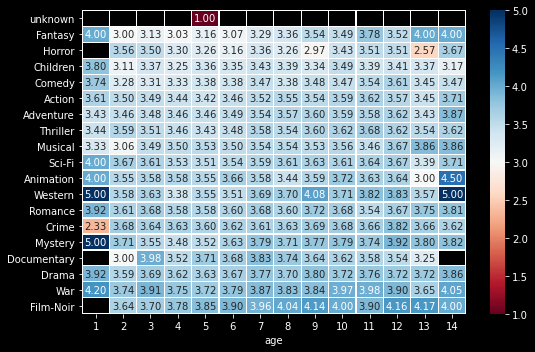

In [288]:
fig, ax = plt.subplots(figsize=(8, 5))

sb.heatmap(ax=ax, data=gby_genre_age, annot=True, annot_kws={"size": 10}, fmt=".2f", linewidths=0.2, center=3, cmap="RdBu")

fig.tight_layout()